In [39]:
import pandas as pd
import json
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
crime_file = "_Change_Notice__Police_Department_Incidents.csv"
crime_data_All_DF = pd.read_csv(crime_file)
crime_data_All_DF.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074


In [9]:
len(crime_data_All_DF)

2184879

In [10]:
crime_data_All_DF = crime_data_All_DF.sort_values(["Date"], ascending=False)
crime_data_All_DF.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2046707,171055344,FRAUD,"CREDIT CARD, THEFT BY USE OF",Sunday,12/31/2017,15:00,PARK,NONE,FULTON ST / PIERCE ST,-122.434866,37.777281,"(37.77728097494415, -122.43486585349764)",17105534409320
1892266,180002786,FORGERY/COUNTERFEITING,"FORGERY, NOTES",Sunday,12/31/2017,22:30,BAYVIEW,NONE,100 Block of COLBY ST,-122.413784,37.728286,"(37.72828621932752, -122.41378387003788)",18000278609150


In [11]:
# Get a reference to the column names
crime_data_All_DF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [12]:
# Rename column headers
crime_data_All_DF = crime_data_All_DF.rename(columns={"IncidntNum":"ID",
                                       "Category":"Category",
                                       "Descript":"Descript",
                                       "DayOfWeek":"Day Of Week",
                                       "Date":"Date",
                                       "Time":"Time",
                                       "PdDistrict":"District",
                                       "Resolution":"Resolution"})
crime_data_All_DF.columns

Index(['ID', 'Category', 'Descript', 'Day Of Week', 'Date', 'Time', 'District',
       'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [13]:
# Extract some columns
crime_data_All_DF = crime_data_All_DF.loc[:,['Category', 'Descript', 'Day Of Week', 'Date', 'Time', 'District',
       'Resolution', 'Address', 'X', 'Y']]
crime_data_All_DF.head(2)

,Category,Descript,Day Of Week,Date,Time,District,Resolution,Address,X,Y
2046707,FRAUD,"CREDIT CARD, THEFT BY USE OF",Sunday,12/31/2017,15:00,PARK,NONE,FULTON ST / PIERCE ST,-122.434866,37.777281
1892266,FORGERY/COUNTERFEITING,"FORGERY, NOTES",Sunday,12/31/2017,22:30,BAYVIEW,NONE,100 Block of COLBY ST,-122.413784,37.728286


In [14]:
# Create a new columns for Year, Day and Month
crime_data_All_DF["Year"] = crime_data_All_DF["Date"].str.rstrip('/').str.split('/').str[2]
crime_data_All_DF["Day"] = crime_data_All_DF["Date"].str.rstrip('/').str.split('/').str[1]
crime_data_All_DF["Month"] = crime_data_All_DF["Date"].str.rstrip('/').str.split('/').str[0]
crime_data_All_DF["Hour"] = crime_data_All_DF["Time"].str.rstrip(':').str.split(':').str[0].astype(int)  

crime_data_All_DF = crime_data_All_DF.sort_values(["Year"], ascending=False)

crime_data_All_DF.head(2)

,Category,Descript,Day Of Week,Date,Time,District,Resolution,Address,X,Y,Year,Day,Month,Hour
1909288,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Sunday,01/28/2018,16:30,PARK,NONE,700 Block of CLAYTON ST,-122.448266,37.767909,2018,28,01,16
1893084,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Wednesday,01/03/2018,12:35,BAYVIEW,NONE,1100 Block of 4TH ST,-122.391470,37.773118,2018,03,01,12


In [15]:
bins = [0, 7, 14, 20, 23]
group_names = ['EarlyMorning', 'Morning', 'Evening', 'Night']


crime_data_All_DF["Hour_Bin"] = pd.cut(crime_data_All_DF["Hour"], bins, labels=group_names)
crime_data_All_DF.head(2)

,Category,Descript,Day Of Week,Date,Time,District,Resolution,Address,X,Y,Year,Day,Month,Hour,Hour_Bin
1909288,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Sunday,01/28/2018,16:30,PARK,NONE,700 Block of CLAYTON ST,-122.448266,37.767909,2018,28,01,16,Evening
1893084,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Wednesday,01/03/2018,12:35,BAYVIEW,NONE,1100 Block of 4TH ST,-122.391470,37.773118,2018,03,01,12,Morning


In [16]:
crime_data_All_DF = crime_data_All_DF.sort_values(['Year','Month', 'Day'], ascending=[False, True,True])
crime_data_All_DF.head(2)

,Category,Descript,Day Of Week,Date,Time,District,Resolution,Address,X,Y,Year,Day,Month,Hour,Hour_Bin
1891996,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Monday,01/01/2018,14:07,MISSION,"ARREST, BOOKED",1400 Block of HAMPSHIRE ST,-122.406622,37.749348,2018,01,01,14,Morning
1892001,OTHER OFFENSES,RESISTING ARREST,Monday,01/01/2018,14:50,CENTRAL,"ARREST, BOOKED",1000 Block of FRONT ST,-122.400322,37.801310,2018,01,01,14,Morning


In [17]:
crime_data_All_DF["Year"].value_counts()

2015    156526
2017    154245
2013    152806
2016    150883
2014    150128
2003    149176
2004    148148
2005    142186
2008    141311
2012    140847
2009    139860
2006    137853
2007    137639
2010    133523
2011    132697
2018     17051
Name: Year, dtype: int64

In [21]:
# Creating a data frame for each year
crime_data_2003_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2003",:]
crime_data_2004_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2004",:]
crime_data_2005_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2005",:]
crime_data_2006_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2006",:]
crime_data_2007_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2007",:]
crime_data_2008_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2008",:]
crime_data_2009_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2009",:]
crime_data_2010_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2010",:]
crime_data_2011_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2011",:]
crime_data_2012_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2012",:]
crime_data_2013_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2013",:]
crime_data_2014_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2014",:]
crime_data_2015_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2015",:]
crime_data_2016_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2016",:]
crime_data_2017_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2017",:]
crime_data_2018_DF = crime_data_All_DF.loc[crime_data_All_DF["Year"] == "2018",:]

In [20]:
crime_data_All_DF["Resolution"].value_counts()

NONE                                      1366994
ARREST, BOOKED                             517714
ARREST, CITED                              154789
LOCATED                                     34463
PSYCHOPATHIC CASE                           29185
UNFOUNDED                                   23630
JUVENILE BOOKED                             13978
COMPLAINANT REFUSES TO PROSECUTE             8089
DISTRICT ATTORNEY REFUSES TO PROSECUTE       7955
NOT PROSECUTED                               7720
JUVENILE CITED                               6586
PROSECUTED BY OUTSIDE AGENCY                 5070
EXCEPTIONAL CLEARANCE                        4239
JUVENILE ADMONISHED                          3004
JUVENILE DIVERTED                             694
CLEARED-CONTACT JUVENILE FOR MORE INFO        684
PROSECUTED FOR LESSER OFFENSE                  85
Name: Resolution, dtype: int64

# 2016 Heatmap

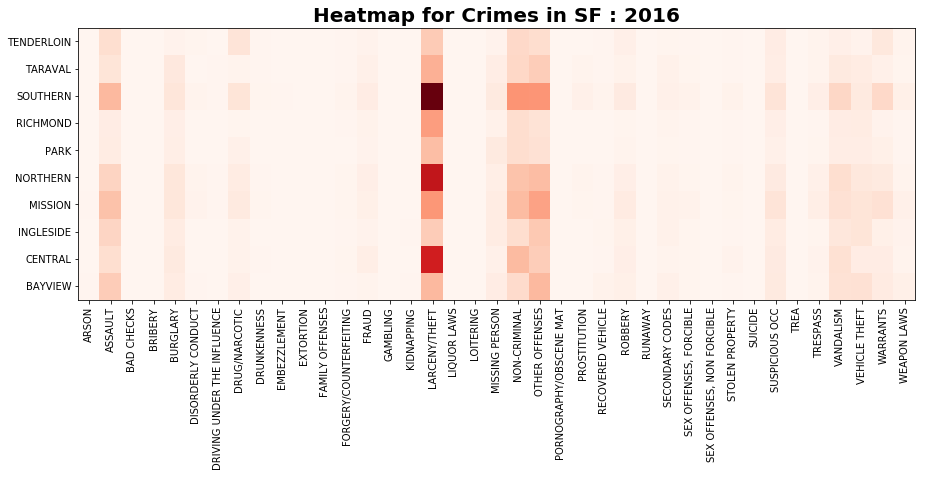

In [131]:
#Cross-tabulate Category and PdDistrict
crime_data_2016_CT = pd.crosstab(crime_data_2016_DF.District,crime_data_2016_DF.Category,margins=True)
del crime_data_2016_CT['All'] #delete the All column
crime_data_2016_CT = crime_data_2016_CT.iloc[:-1]# delete last row (All)

#set the labels
column_labels_2016 = list(crime_data_2016_CT.columns.values)
row_labels_2016 = crime_data_2016_CT.index.values.tolist()

#plot to a heatmap using matplotlib  
fig,ax = plt.subplots()
heatmap = ax.pcolor(crime_data_2016_CT,cmap='Reds')

#format
 
fig.set_size_inches(15,5)
 

# Tick placement 

ax.set_yticks(np.arange(crime_data_2016_CT.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(crime_data_2016_CT.shape[1])+0.5, minor=False)

 
ax.set_xticklabels(column_labels_2016, minor=False)
ax.set_yticklabels(row_labels_2016, minor=False)
#rotate
plt.xticks(rotation=90)
plt.title("Heatmap for Crimes in SF : 2016", fontsize=20, weight='bold')
plt.savefig ("Heat_map_2016.png")
plt.show()

# 2017 Heatmap

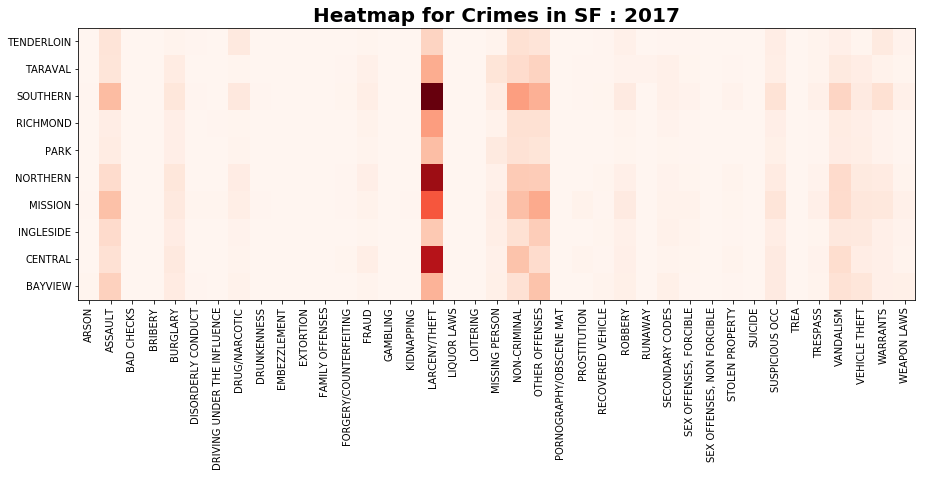

In [132]:
#Cross-tabulate Category and PdDistrict
crime_data_2017_CT = pd.crosstab(crime_data_2017_DF.District,crime_data_2017_DF.Category,margins=True)
del crime_data_2017_CT['All'] #delete the All column
crime_data_2017_CT = crime_data_2017_CT.iloc[:-1]# delete last row (All)

#set the labels
column_labels_2017 = list(crime_data_2017_CT.columns.values)
row_labels_2017 = crime_data_2017_CT.index.values.tolist()

#plot to a heatmap using matplotlib  
fig,ax = plt.subplots()
heatmap = ax.pcolor(crime_data_2017_CT,cmap='Reds')

#format
 
fig.set_size_inches(15,5)
 

# Tick placement 

ax.set_yticks(np.arange(crime_data_2017_CT.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(crime_data_2017_CT.shape[1])+0.5, minor=False)

 
ax.set_xticklabels(column_labels_2017, minor=False)
ax.set_yticklabels(row_labels_2017, minor=False)
#rotate
plt.xticks(rotation=90)
plt.title("Heatmap for Crimes in SF : 2017", fontsize=20, weight='bold')
plt.savefig ("Heat_map_2017.png")
plt.show()

# 2018 Heatmap

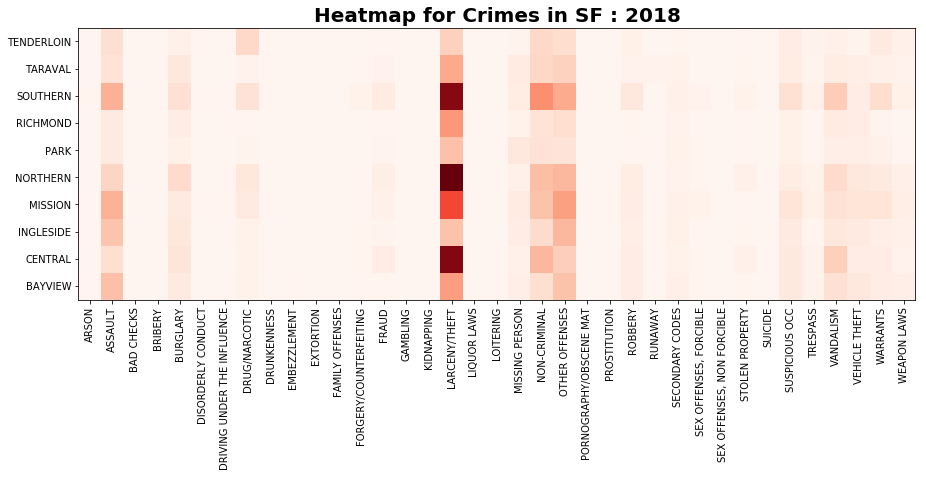

In [133]:
#Cross-tabulate Category and PdDistrict
crime_data_2018_CT = pd.crosstab(crime_data_2018_DF.District,crime_data_2018_DF.Category,margins=True)
del crime_data_2018_CT['All'] #delete the All column
crime_data_2018_CT = crime_data_2018_CT.iloc[:-1]# delete last row (All)

#set the labels
column_labels_2018 = list(crime_data_2018_CT.columns.values)
row_labels_2018 = crime_data_2018_CT.index.values.tolist()

#plot to a heatmap using matplotlib  
fig,ax = plt.subplots()
heatmap = ax.pcolor(crime_data_2018_CT,cmap='Reds')

#format
 
fig.set_size_inches(15,5)
 

# Tick placement 

ax.set_yticks(np.arange(crime_data_2018_CT.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(crime_data_2018_CT.shape[1])+0.5, minor=False)

 
ax.set_xticklabels(column_labels_2018, minor=False)
ax.set_yticklabels(row_labels_2018, minor=False)
#rotate
plt.xticks(rotation=90)
plt.title("Heatmap for Crimes in SF : 2018", fontsize=20, weight='bold')
plt.savefig ("Heat_map_2018.png")
plt.show()

# Frequency of Crimes per Category 2016

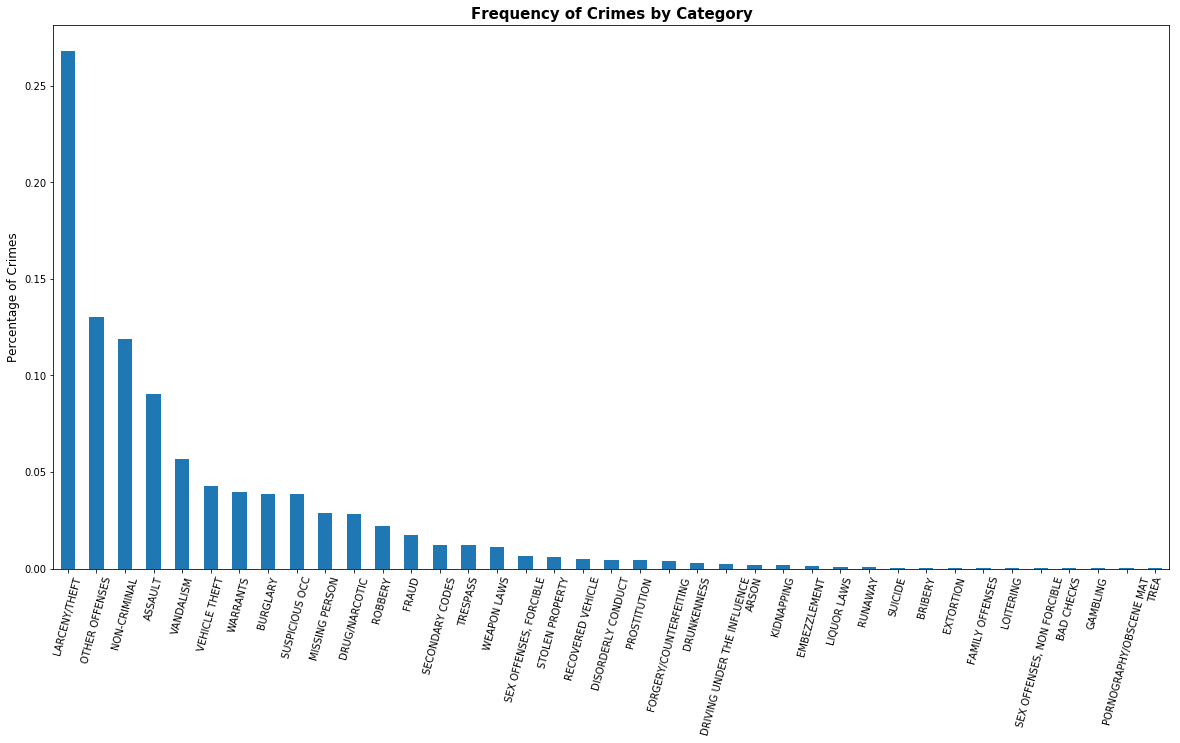

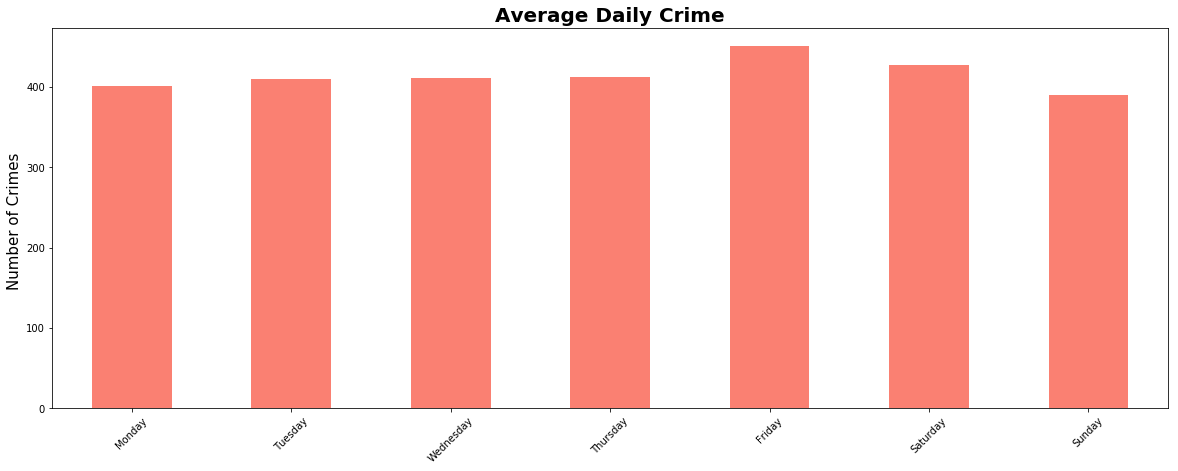

In [134]:
#frequency count for Category
Category_crimes_2016_df = pd.DataFrame(crime_data_2016_DF.Category.value_counts())


Category_crimes_2016["Percentage"] = Category_crimes_2016["Category"]/Category_crimes_2016["Category"].sum()
Category_crimes_2016
 
fig = Category_crimes_2016["Percentage"].plot(kind="bar", figsize = (20,10), rot=75) 

fig.set_title("Frequency of Crimes by Category", fontsize=15, weight = "bold")
fig.set_ylabel("Percentage of Crimes", fontsize=12)
plt.savefig('perc_crime_category_2016.png')
plt.show()


#Average daily crime per category
avg_daily_crime = pd.DataFrame(crime_data_2016_DF["Day Of Week"].value_counts()/52)

avg_daily_crime.columns=['avg']
avg_daily_crime.reset_index(inplace=True)
avg_daily_crime.rename(columns = {"index": "day"},   inplace=True)
avg_daily_crime

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = avg_daily_crime['day'].map(mapping)
avg_daily_crime = avg_daily_crime.iloc[key.argsort()]

ax= avg_daily_crime.plot(x='day', kind="bar", figsize = (20,7), width = 0.5, rot=45, color= "salmon", legend=False)
ax.set_xlabel('')

ax.set_title("Average Daily Crime", fontsize=20, weight='bold')
ax.set_ylabel("Number of Crimes ", fontsize= 15)
plt.savefig('avg_daily2016.png')


# Frequency of Crime per Category 2017

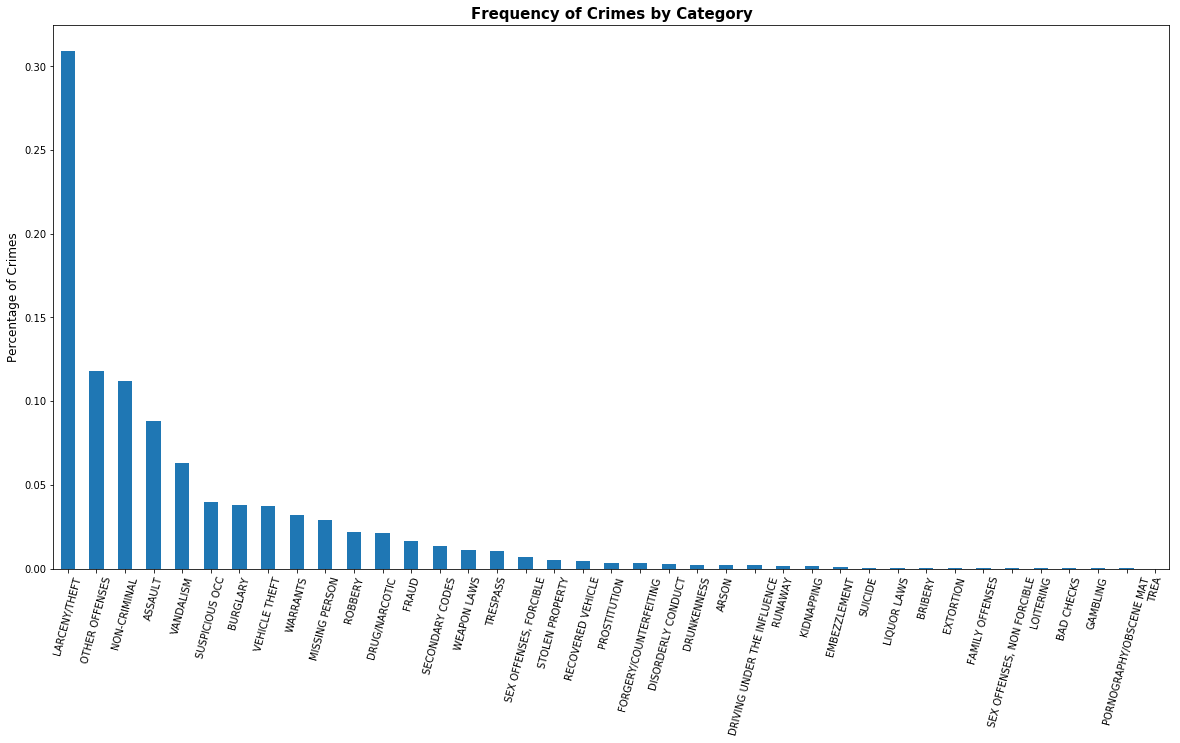

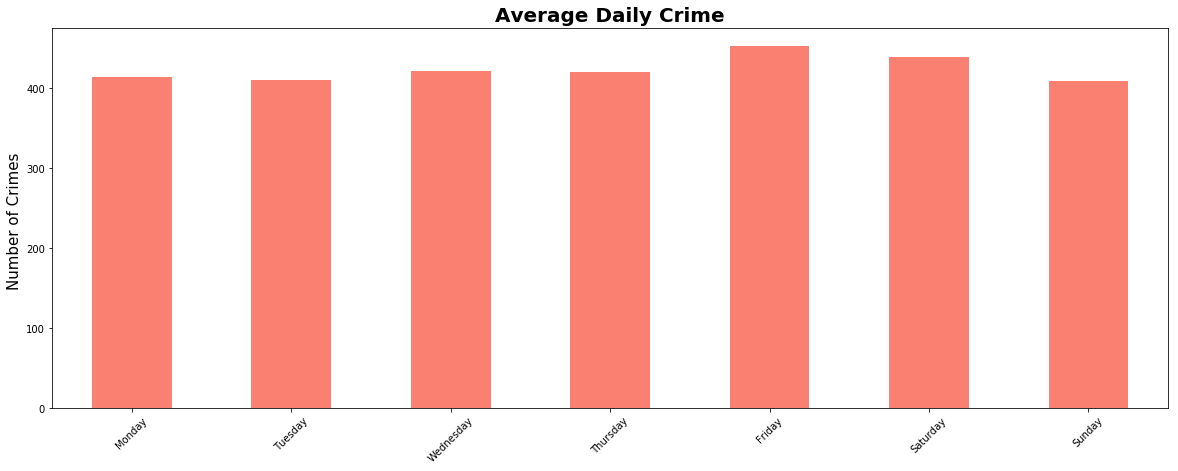

In [135]:
# Percentage of crime per category
Category_crimes_2017_df = pd.DataFrame(crime_data_2017_DF.Category.value_counts())


Category_crimes_2017_df["Percentage"] = Category_crimes_2017_df["Category"]/Category_crimes_2017_df["Category"].sum()
 
fig = Category_crimes_2017_df["Percentage"].plot(kind="bar", figsize = (20,10), rot=75) 

fig.set_title("Frequency of Crimes by Category", fontsize=15, weight = "bold")
fig.set_ylabel("Percentage of Crimes", fontsize=12)
plt.savefig('perc_crime_category_2017.png')
plt.show()


# Average daily crime per category
avg_daily_crime = pd.DataFrame(crime_data_2017_DF["Day Of Week"].value_counts()/52)

avg_daily_crime.columns=['avg']
avg_daily_crime.reset_index(inplace=True)
avg_daily_crime.rename(columns = {"index": "day"},   inplace=True)
avg_daily_crime

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = avg_daily_crime['day'].map(mapping)
avg_daily_crime = avg_daily_crime.iloc[key.argsort()]

ax= avg_daily_crime.plot(x='day', kind="bar", figsize = (20,7), width = 0.5, rot=45, color= "salmon", legend=False)
ax.set_xlabel('')

ax.set_title("Average Daily Crime", fontsize=20, weight='bold')
ax.set_ylabel("Number of Crimes ", fontsize= 15)
plt.savefig('avg_daily2017.png')


# Frequency of Crime per Category 2018

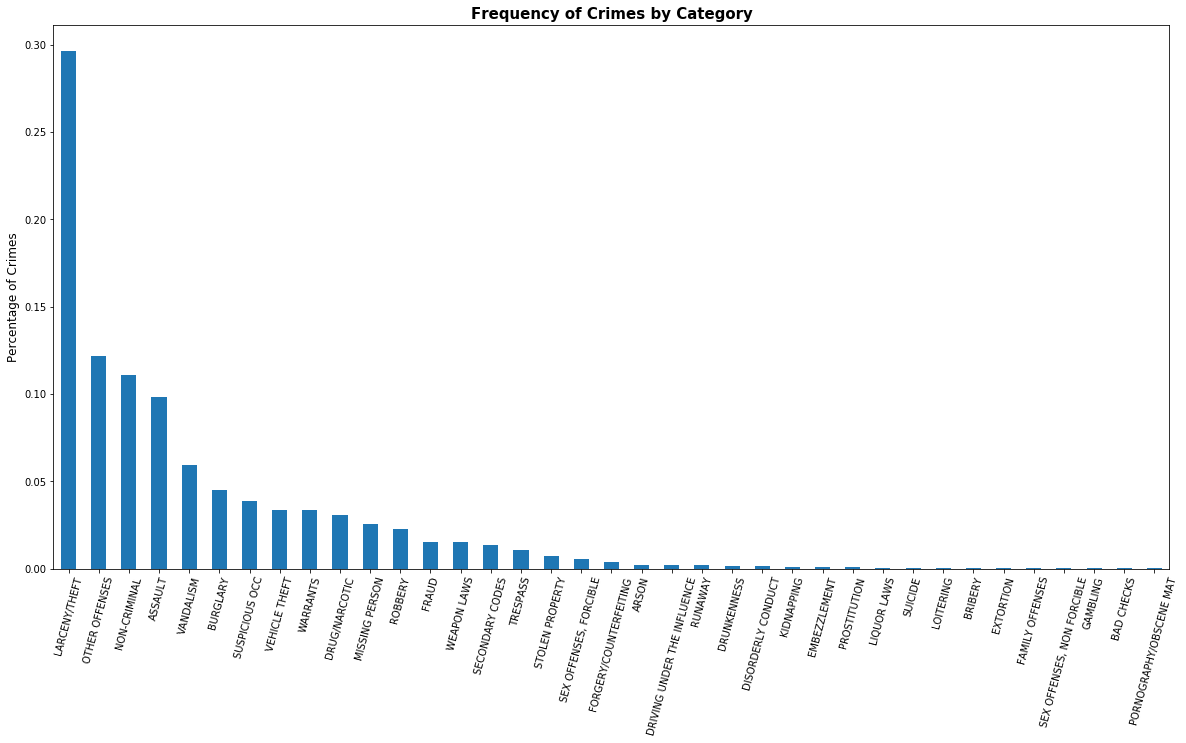

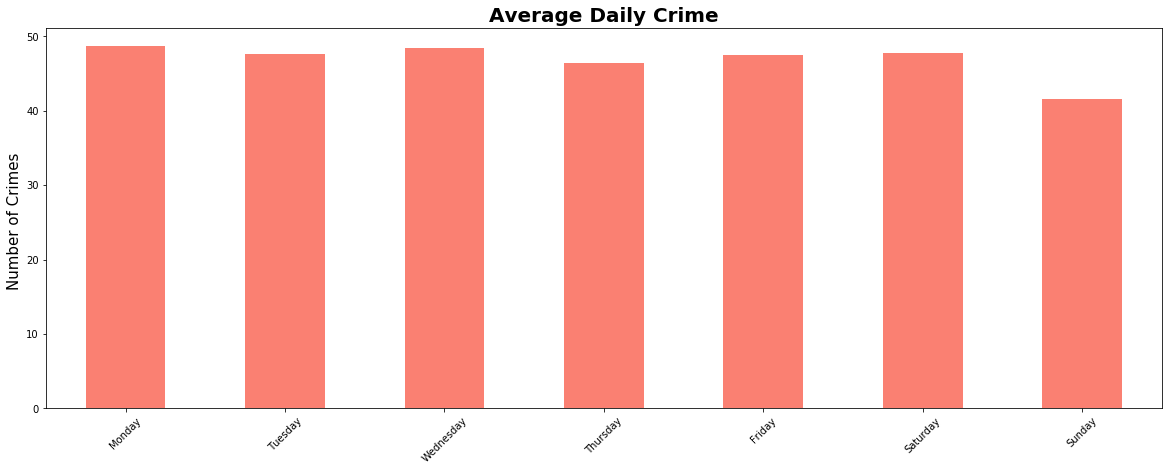

In [136]:
# Percentage of crime per category

Category_crimes_2018_df = pd.DataFrame(crime_data_2018_DF.Category.value_counts())


Category_crimes_2018_df["Percentage"] = Category_crimes_2018_df["Category"]/Category_crimes_2018_df["Category"].sum()
 
fig = Category_crimes_2018_df["Percentage"].plot(kind="bar", figsize = (20,10), rot=75) 

fig.set_title("Frequency of Crimes by Category", fontsize=15, weight = "bold")
fig.set_ylabel("Percentage of Crimes", fontsize=12)
plt.savefig('perc_crime_category_2018.png')
plt.show()


# Average daily crime per category

avg_daily_crime = pd.DataFrame(crime_data_2018_DF["Day Of Week"].value_counts()/52)

avg_daily_crime.columns=['avg']
avg_daily_crime.reset_index(inplace=True)
avg_daily_crime.rename(columns = {"index": "day"},   inplace=True)
avg_daily_crime

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = avg_daily_crime['day'].map(mapping)
avg_daily_crime = avg_daily_crime.iloc[key.argsort()]

ax= avg_daily_crime.plot(x='day', kind="bar", figsize = (20,7), width = 0.5, rot=45, color= "salmon", legend=False)
ax.set_xlabel('')

ax.set_title("Average Daily Crime", fontsize=20, weight='bold')
ax.set_ylabel("Number of Crimes ", fontsize= 15)
plt.savefig('avg_daily2018.png')


# Heatmap:  crime by District and time 2016

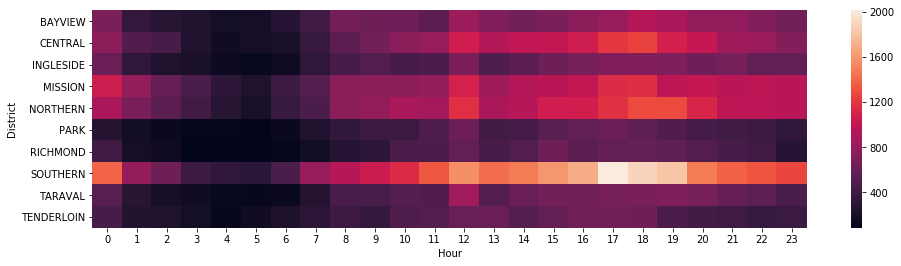

In [137]:
df_gb = pd.DataFrame(crime_data_2016_DF.groupby(['District', 'Hour']).size())
df_gb.reset_index(inplace=True)
df_gb.rename(columns={0:"Crimes"}, inplace=True)
df_h = df_gb.pivot("District", "Hour", "Crimes")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h, ax=ax)
plt.savefig ("heatmap_time_2016.png")

# Heatmap: crime by District and Time 2017

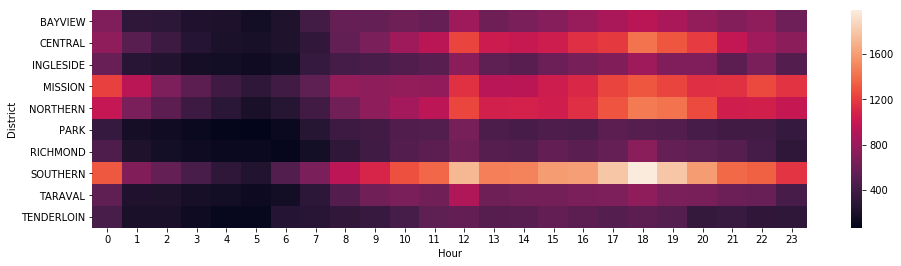

In [138]:
df_gb2 = pd.DataFrame(crime_data_2017_DF.groupby(['District', 'Hour']).size())
df_gb2.reset_index(inplace=True)
df_gb2.rename(columns={0:"Crimes"}, inplace=True)
df_h2 = df_gb2.pivot("District", "Hour", "Crimes")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
plt.savefig ("heatmap_time_2017.png")
ax = sns.heatmap(df_h2, ax=ax)

# Heatmap: crime by District and Time 2018

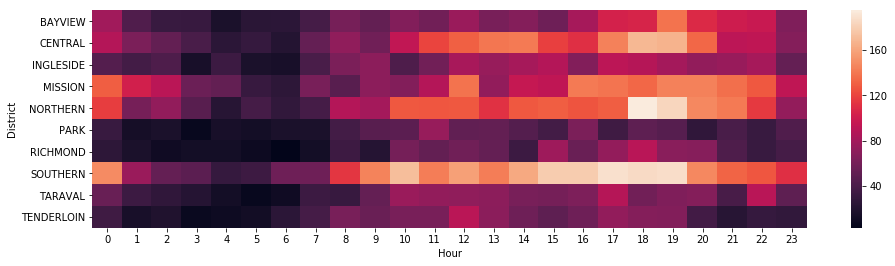

In [139]:
df_gb3 = pd.DataFrame(crime_data_2018_DF.groupby(['District', 'Hour']).size())
df_gb3.reset_index(inplace=True)
df_gb3.rename(columns={0:"Crimes"}, inplace=True)
df_h3 = df_gb3.pivot("District", "Hour", "Crimes")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
plt.savefig ("heatmap_time_2018.png")
ax = sns.heatmap(df_h3, ax=ax)